[[0.97212501]
 [0.7030679 ]
 [0.00583765]
 [0.1181465 ]
 [0.96215517]
 [0.34493985]
 [0.07648634]
 [0.95669071]
 [0.04949812]
 [0.82627435]
 [0.03414681]
 [0.84603632]
 [0.03258022]
 [0.01826958]
 [0.69837266]
 [0.98550138]
 [0.98893651]
 [0.03632318]
 [0.65956607]
 [0.60497306]
 [0.05274564]
 [0.03923673]
 [0.37860102]
 [0.00582619]
 [0.9438697 ]
 [0.03691506]
 [0.85426105]
 [0.01178899]
 [0.07854198]
 [0.74806715]
 [0.97116191]
 [0.05055512]
 [0.61052067]
 [0.9717138 ]
 [0.40484549]
 [0.26981748]
 [0.73870964]
 [0.55761845]
 [0.4908033 ]
 [0.39302128]
 [0.05948404]
 [0.10844471]
 [0.00104431]
 [0.17634524]
 [0.18933232]
 [0.82869868]
 [0.95397112]
 [0.94333559]
 [0.00478994]
 [0.01168916]
 [0.92196114]
 [0.49840777]
 [0.07079478]
 [0.05041557]
 [0.84191582]
 [0.04982646]
 [0.74225368]
 [0.79301141]
 [0.94683273]
 [0.98698383]
 [0.61598618]
 [0.20979017]
 [0.00569986]
 [0.92165314]
 [0.01919262]
 [0.36688017]
 [0.03451803]
 [0.66418107]
 [0.9423649 ]
 [0.29451311]
 [0.18280533]
 [0.89

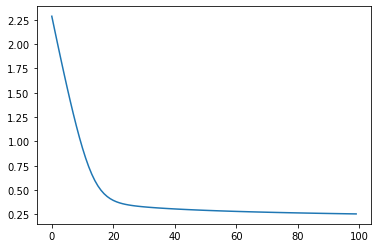

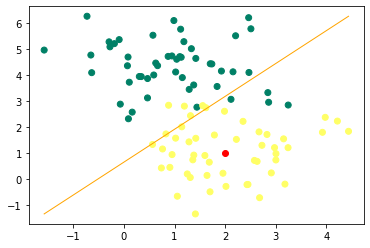

[0.85725004]


In [33]:
from matplotlib import markers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

# create a sample of 100 features 
x,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))

# scatter the sample to visualize clustering
# plt.scatter(x[:,0], x[:,1], c=y, cmap="summer")
# plt.show()

# initializes w and b with random values
def initialisation(x):
  w = np.random.randn(x.shape[1],1)
  b = np.random.randn(1)
  return (w,b)

# creates a model with input values, w and b
def model(x,w,b) :
  z = x.dot(w) + b
  a = 1/(1+np.exp(-z))
  return a

# log loss function for measure errors
def log_loss(a,y) :
   return 1/len(y) * np.sum(-y*np.log(a)-(1-y)*np.log(1-a))

# compute gradients
def gradients(a,x,y) :
  dw = 1/len(y)*np.dot(x.T,a-y)
  db = 1/len(y) * np.sum(a-y)
  return (dw,db)

# update w and b values for the next iteration
def update(dw,db,w,b,learning_rate):
  w = w-learning_rate*dw
  b = b-learning_rate*db
  return (w,b)

# predict the ouput of the model
def predict(x,w,b):
  a = model(x,w,b)
  print(a)
  return a>=0.5

"""
  It's possible to reuse these parameters for future predictions
"""
def artificial_neuron(x,y,learning_rate=0.1,n_iter=100):
  #initialize w,b
  w,b = initialisation(x)
  
  history = []
  loss = []

  # training of the model
  for i in range(n_iter):
    # computes the activation function
    a = model(x,w,b)
    # computes the loss
    loss.append(log_loss(a,y))
    # create gradients
    dw,db = gradients(a,x,y)
    # update
    w,b = update(dw,db,w,b,learning_rate)
    history.append(w,b,loss,i)
  
  y_pred = predict(x,w,b)
  print(accuracy_score(y,y_pred))
  
  plt.plot(loss)
  plt.show()

  return history


# artificial_neuron(x,y)
w,b = artificial_neuron(x,y)

new_plant = np.array([2,1])
x0 = np.linspace(-1,4,100)
x1 = (-w[0]*x0-b)/w[1]

plt.scatter(x[:,0], x[:,1], c=y, cmap="summer")

x0 = np.linspace(x[:,0].min(), x[:,0].max(),100)
x1 = np.linspace(x[:,1].min(), x[:,1].max(),100)
xx0, xx1 = np.meshgrid(x0,x1)
z = w[0] * xx0 + w[1]*xx1 + b
a = 1/(1+np.exp(-z))

fig = (
    go.Figure(data=[go.Surface(z=a,x=xx0,y=xx1,colorscale = 'YlGn',opacity = 0.8, reversescale = True)])
)
fig.add_scatter3d(x=x[:,0].flatten(), y=x[:,1].flatten(),mode='markers',marker = dict(
        size = 5,
        color = y.flatten(),
        colorscale = 'YlGn',
        opacity = 0.8,
        reversescale = True
    ))
fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0,x1,c='orange', lw=1)
plt.show()
y = predict(new_plant, w, b)

